In [1]:
import warnings
import pandas            as pd
import numpy             as np
import seaborn           as sns
import matplotlib.pyplot as plt 

from sklearn.utils import resample

In [2]:
# set params
warnings.filterwarnings("ignore")

## Example: Central Limit Theorem (the tendency of sample distributions to take normal distribution)

Histogram of annual incomes of 1,000 loan applicants (top), then 1,000 means of n=5 applicants (middle), and finally 1,000 means of n=20 applicants (bottom)

In [3]:
# load data
loans_income = pd.read_csv('data/loans_income.csv')

# select a sample of 1k
sample_data = loans_income.sample(1000).reset_index(drop=True)
sample_data['type'] = 'sample'

# select 1k means of 5
sample_mean_5 = pd.DataFrame([loans_income.sample(5).mean() for _ in range(1000)]).reset_index(drop=True)
sample_mean_5['type'] = 'mean_of_5'

# select 1k means of 20
sample_mean_20 = pd.DataFrame([loans_income.sample(20).mean() for _ in range(1000)]).reset_index(drop=True)
sample_mean_20['type'] = 'mean_of_20'

# concat results
results = pd.concat([sample_data, sample_mean_5, sample_mean_20], axis=0).reset_index(drop=True)

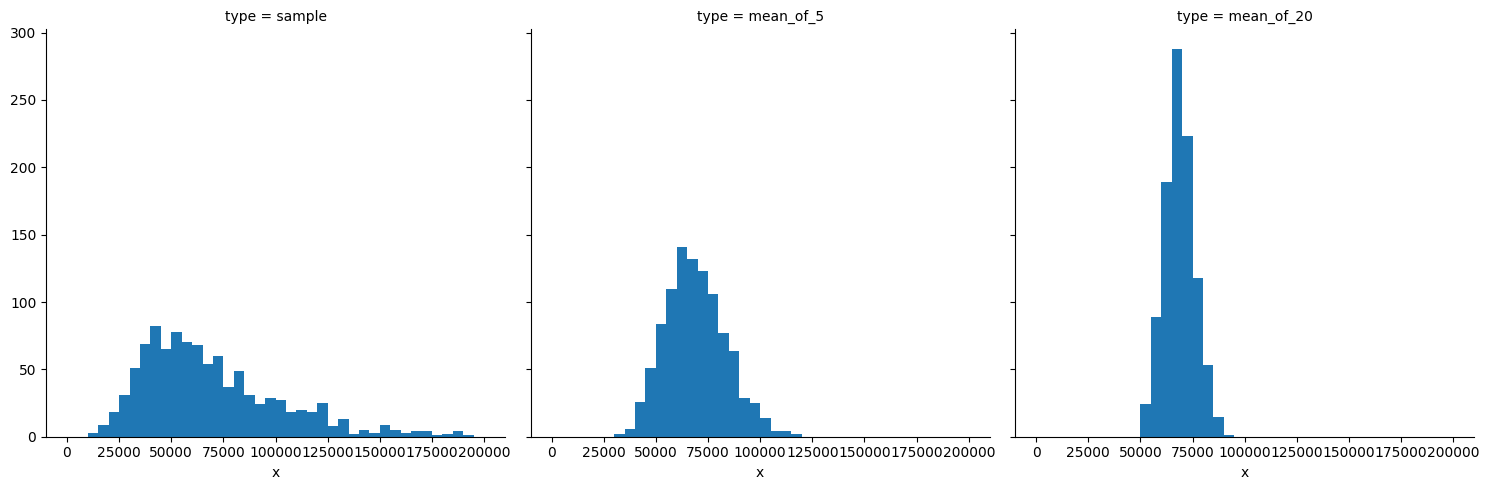

In [4]:
g = sns.FacetGrid(results, col='type', height=5)
g.map(plt.hist, 'x', range=[0, 200000], bins=40)
plt.show()

## Example:  The bootstrap to the median incomes of people taking out loans 

In [5]:
results = []

for i in range(1000):
    # draw resamples
    sample = resample(loans_income)

    # Take the median of each sample
    results.append(sample.median())

results = pd.Series(results)

In [8]:
print('Bootstap Statistics:\n')

print(f'original: {loans_income.median()}')
print('----------------')
print(f'bias: {results.mean() - loans_income.median()}')
print('----------------')
print(f'std. error: {results.std()}')

Bootstap Statistics:

original: x    62000.0
dtype: float64
----------------
bias: x   -76.284
dtype: float64
----------------
std. error: 218.00799143225996


## Bootstrap confidence interval for the annual income of loan applicants, based on a sample of 20

In [12]:
#n of iteractions
n_iterations = 1000

# list to store bootstap statistics
bs_stats = []

# run bootstrap and calculate statistics
for _ in range(n_iterations):
    sample = resample(loans_income)
    statistic = np.mean(sample)
    bs_stats.append(statistic)

# calculate confidence interval of 99%
ci = np.percentile(bs_stats, [0.5, 99.5])

print(f'Confidence Interval: {ci}')

Confidence Interval: [68358.9467774 69169.8590832]


90% - Confidence Interval: **[68511.13 - 69008.22]**    
95% - Confidence Interval: **[68464.46 - 69025.38]**    
99% - Confidence Interval: **[68358.95 - 69169.86]**    